In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

% matplotlib inline

In [2]:
loc = r'C:\Users\c0w00f8.WMSC\Documents\Coursera\1. Machine Learning\machine-learning-ex7\ex7\ex7data2.mat'
data = loadmat(loc)
data = data['X']
data.shape

(300, 2)

In [3]:
def findClosestCentroids(x, centroids):
    k = centroids.shape[0]
    dist = np.zeros((x.shape[0], k))
    
    for i in range(x.shape[0]):
        for j in range(k):
            dist[i, j] = np.linalg.norm(x[i, :] - centroids[j, :]) ** 2
    
    idx = np.argmin(dist, axis = 1)
    cost = (np.min(dist, axis = 1)).sum()
    
    return idx, cost

In [4]:
# test findClosestCentroids w/ first 3 samples in dataset
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx_test, cost_test = findClosestCentroids(data, initial_centroids)
idx_test[:3]
#cost_test

array([0, 2, 1], dtype=int64)

In [5]:
#idx_full, cost = findClosestCentroids(data, initial_centroids)
#data_1 = data[idx_full == 1, :]
#data_1.sum(axis = 0)

In [6]:
def computeCentroids(x, idx, k):
    centroids = np.zeros((k, x.shape[1]))
    
    for i in range(k):
        x_sub = x[(idx == i), :]
        #centroids[i, :] = x_sub.sum(axis = 0) / x_sub.shape[0]
        centroids[i, :] = x_sub.mean(axis = 0)
    
    return centroids 

In [7]:
test_compCent = computeCentroids(data, idx_test, 3)
test_compCent

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [8]:
def initCentroids(x, k):
    m = x.shape[0]
    rand_idx = np.random.choice(m, k, replace=False)
    centroids = x[rand_idx, :]
    
    # another way to generate random k idx without replacement
    # idx = np.random.permutation(np.arange(m))[:k]
    
    return centroids

In [9]:
# test random initialization
initC = initCentroids(data, 3)
initC

array([[2.85962615, 5.26041997],
       [5.74036233, 3.10391306],
       [6.29206262, 2.77573856]])

In [10]:
def runKmeans(x, init_centroids, max_iters, plot):
    k = init_centroids.shape[0]
    cent = init_centroids
    
    # keep idx and cent for plots
    idx_mat = np.zeros((x.shape[0], max_iters))
    cent_mat = np.zeros((max_iters, k, x.shape[1]))
    
    for i in range(max_iters):
        
        # assign centroid for each x
        x_idx, cost = findClosestCentroids(x, cent)
        
        # compute new centroid
        cent = computeCentroids(x, x_idx, k)
        
        # keep x_idx and cent for plot use
        idx_mat[:, i] = x_idx
        cent_mat[i, :, :] = cent
        
    if plot == True:
        #plotKmeans(x, cent_mat, idx_mat)
        return cent_mat, idx_mat

    else: return cent, x_idx, cost

In [11]:
'Iterarion number: ' + str(1)

'Iterarion number: 1'

In [12]:
def plotKmeans(x, cent, idx):
    
    fig = plt.figure(figsize=(12,18))
    iters = idx.shape[1]

    for i in range(max_iters):        
        ax = fig.add_subplot(3, 4, i+1)
        title = ax.set_title('Iterarion number: ' + str(i+1))
        plot_data_0 = ax.scatter(data[idx[:,i]==0, 0], data[idx[:,i]==0, 1], marker='.', c='pink')
        plot_data_1 = ax.scatter(data[idx[:,i]==1, 0], data[idx[:,i]==1, 1], marker='.', c='skyblue')
        plot_data_2 = ax.scatter(data[idx[:,i]==2, 0], data[idx[:,i]==2, 1], marker='.', c='olive')
        plot_cent = ax.scatter(cent[i, :, 0], cent[i, :, 1], marker='X', c='black') 

In [13]:
k = 3
init_cent = initCentroids(data, k)
max_iters = 12
plot = True

cent, idx = runKmeans(data, init_cent, max_iters, plot)
idx.shape

(300, 12)

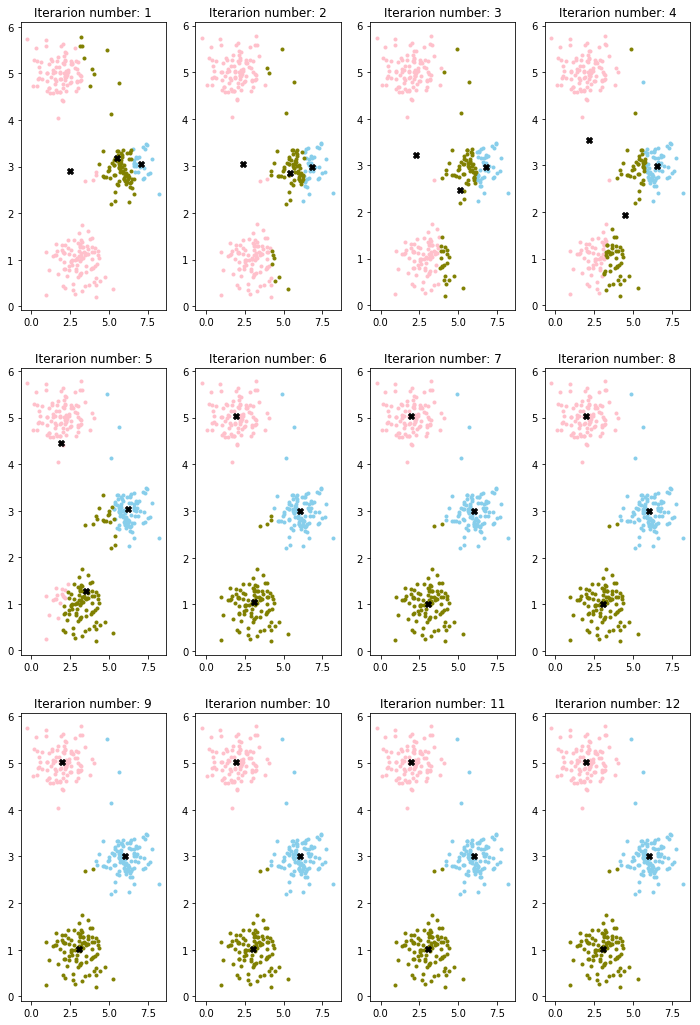

In [14]:
# test plot
plotKmeans(data, cent, idx)

In [15]:
# Image compression with K-means

In [ ]:
# read image

In [43]:
import matplotlib.image as mpimg

In [68]:
loc_img = r'C:\Users\c0w00f8.WMSC\Documents\Coursera\1. Machine Learning\machine-learning-ex7\ex7\bird_small.png'
bird_img = mpimg.imread(loc_img)

In [86]:
originShape = bird_img.shape
originShape

(128, 128, 3)

In [47]:
#bird_img

In [48]:
loc_mat = r'C:\Users\c0w00f8.WMSC\Documents\Coursera\1. Machine Learning\machine-learning-ex7\ex7\bird_small.mat'
bird = loadmat(loc_mat)
bird = bird['A']
bird.shape
bird = bird / 225

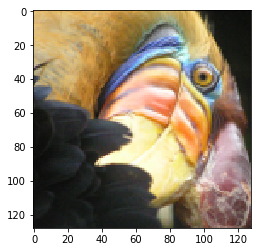

In [69]:
imgplot = plt.imshow(bird_img)

In [65]:
bird = bird.astype(np.float32)
type(bird[49, 32, 2])

numpy.float32

In [70]:
# reshape
m = bird_img.shape[0] * bird_img.shape[1]
bird_data = bird_img.reshape((m, bird_img.shape[2]))
bird_data.shape

(16384, 3)

In [71]:
# k-means
k = 16
max_iters = 10
init_cent = initCentroids(bird_data, k)
plot = False

cent, idx, cost = runKmeans(bird_data, init_cent, max_iters, plot)

In [79]:
# find closest cluster members
idx2, cost = findClosestCentroids(bird_data, cent)
idx2

array([10, 10, 10, ...,  6,  6,  0], dtype=int64)

In [84]:
bird_compresed = cent[idx, :]
bird_compresed.shape

(16384, 3)

In [88]:
bird_compresed_reshaped = bird_compresed.reshape(originShape)
bird_compresed_reshaped.shape

(128, 128, 3)

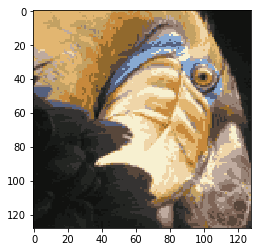

In [89]:
img_compressed = plt.imshow(bird_compresed_reshaped)

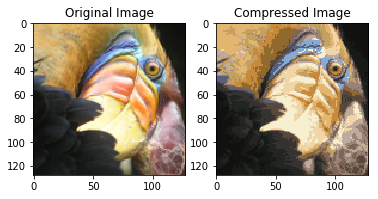

In [95]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
title1 = ax.set_title('Original Image')
imgplot = ax.imshow(bird_img)

ax2 = fig.add_subplot(1, 2, 2)
title2 = ax2.set_title('Compressed Image')
img_compressed = ax2.imshow(bird_compresed_reshaped)

In [24]:
xxx = np.array([[[1, 0], [1, 1], [1, 2]],[[2, 0], [2, 1], [2, 2]],[[3, 0], [3, 1], [3, 2]]])
xxx[0, :, :]

array([[1, 0],
       [1, 1],
       [1, 2]])

In [25]:
xx = np.array([[1, 1], [2, 2], [3, 3]])
xx.shape

(3, 2)

In [26]:
xxx[0, :, :] = xx
xxx

array([[[1, 1],
        [2, 2],
        [3, 3]],

       [[2, 0],
        [2, 1],
        [2, 2]],

       [[3, 0],
        [3, 1],
        [3, 2]]])

In [29]:
yyy = np.zeros((3, 2))
yyy

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [30]:
yy = np.array([1, 2, 3])
yyy[:, 1] = yy
yyy

array([[0., 1.],
       [0., 2.],
       [0., 3.]])

In [33]:
xr = xxx.reshape((9,2))
xr

array([[1, 1],
       [2, 2],
       [3, 3],
       [2, 0],
       [2, 1],
       [2, 2],
       [3, 0],
       [3, 1],
       [3, 2]])

In [34]:
xxx

array([[[1, 1],
        [2, 2],
        [3, 3]],

       [[2, 0],
        [2, 1],
        [2, 2]],

       [[3, 0],
        [3, 1],
        [3, 2]]])